In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [2]:
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

In [3]:
print(train_X.shape, test_X.shape, train_Y.shape, test_Y.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


3


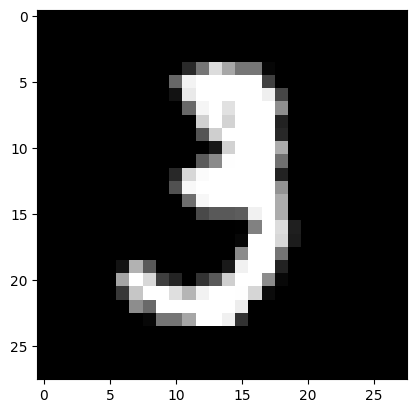

In [4]:
plt.imshow(train_X[10], cmap = 'gray')
print(train_Y[10])

In [5]:
from tensorflow.keras.utils import to_categorical

In [6]:
train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)

In [7]:
train_Y[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [8]:
train_X = train_X/255
test_X = test_X/255

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


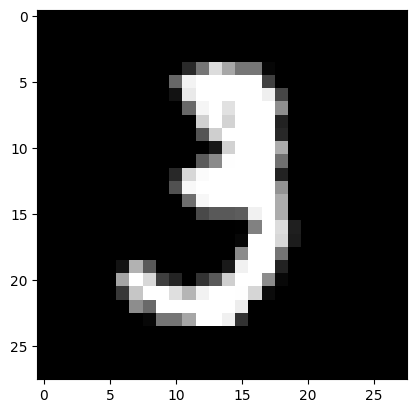

In [9]:
plt.imshow(train_X[10], cmap = 'gray')
print(train_Y[10])

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
model = Sequential(name = 'ANN_MNIST')
model.add(tf.keras.layers.Flatten())
model.add(Dense(650, input_dim = (28 * 28), activation = 'relu', name = 'Layer1'))
model.add(Dense(500, activation = 'relu', name = 'Layer2'))
model.add(Dense(350, activation = 'relu', name = 'Layer3'))
model.add(Dense(200, activation = 'relu', name = 'Layer4'))
model.add(Dense(100, activation = 'relu', name = 'Layer5'))
model.add(Dense(10, activation = 'softmax', name = 'Layer6'))

In [12]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [13]:
model.build((None, 784))
model.summary()

Model: "ANN_MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 Layer1 (Dense)              (None, 650)               510250    
                                                                 
 Layer2 (Dense)              (None, 500)               325500    
                                                                 
 Layer3 (Dense)              (None, 350)               175350    
                                                                 
 Layer4 (Dense)              (None, 200)               70200     
                                                                 
 Layer5 (Dense)              (None, 100)               20100     
                                                                 
 Layer6 (Dense)              (None, 10)                10

In [14]:
hist = model.fit(train_X, train_Y, batch_size = 50, epochs = 10, validation_split = 0.1)

Epoch 1/10
1080/1080 [==============================] - 25s 22ms/step - loss: 0.2299 - accuracy: 0.9314 - val_loss: 0.1072 - val_accuracy: 0.9687
Epoch 2/10
1080/1080 [==============================] - 25s 23ms/step - loss: 0.1009 - accuracy: 0.9701 - val_loss: 0.1157 - val_accuracy: 0.9663
Epoch 3/10
1080/1080 [==============================] - 23s 22ms/step - loss: 0.0776 - accuracy: 0.9772 - val_loss: 0.0795 - val_accuracy: 0.9768
Epoch 4/10
1080/1080 [==============================] - 23s 22ms/step - loss: 0.0578 - accuracy: 0.9831 - val_loss: 0.0920 - val_accuracy: 0.9748
Epoch 5/10
1080/1080 [==============================] - 24s 22ms/step - loss: 0.0458 - accuracy: 0.9864 - val_loss: 0.0761 - val_accuracy: 0.9793
Epoch 6/10
1080/1080 [==============================] - 23s 21ms/step - loss: 0.0397 - accuracy: 0.9887 - val_loss: 0.0827 - val_accuracy: 0.9800
Epoch 7/10
1080/1080 [==============================] - 24s 22ms/step - loss: 0.0357 - accuracy: 0.9900 - val_loss: 0.0755 -

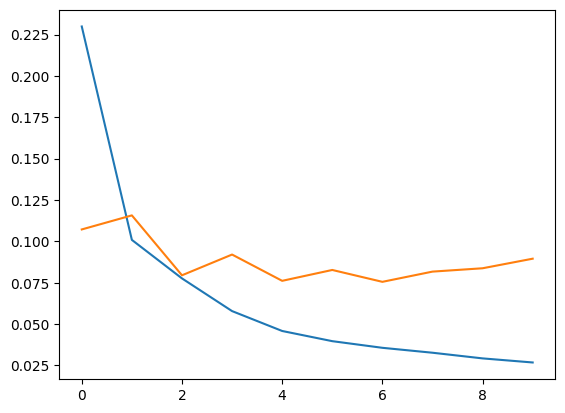

In [15]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

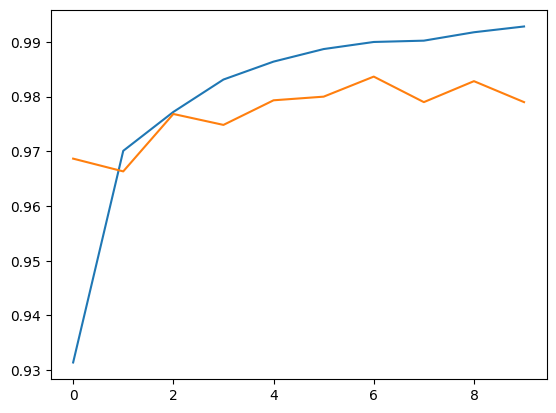

In [16]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [25]:
print(np.argmax(model.predict(test_X[30].reshape(1, 28, 28))))
print(test_Y[30])

1/1 [==============================] - 0s 22ms/step
3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


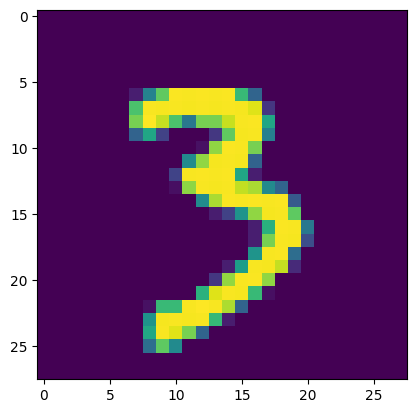

In [24]:
plt.imshow(test_X[30])